In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances
%matplotlib inline

In [25]:
n_samples = 100
random_state = 170
center_points = [[1, 1], [-1,-1], [1,-1]] # sinh ngẫu nhiên các điểm xung quanh vị trí tâm cố định
# center_points = 3 # tâm cụm được chọn ngẫu nhiên
X, y = make_blobs(n_samples = n_samples, random_state = random_state, centers = center_points, cluster_std = 0.6)
print("Số chiều dữ liệu: ", X.shape, y.shape)
print("5 điểm dữ liệu đầu tiên: \n", X[:5])

Số chiều dữ liệu:  (100, 2) (100,)
5 điểm dữ liệu đầu tiên: 
 [[ 1.26241305  0.94872541]
 [-0.39743873 -1.18567406]
 [ 1.35081331  0.48041993]
 [ 1.21219555  0.98929291]
 [-0.75344338 -1.09784774]]


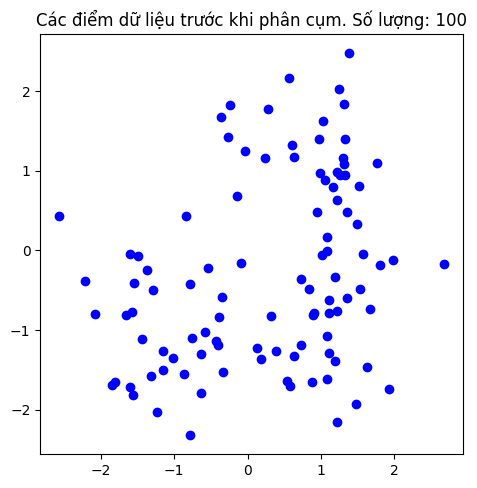

In [26]:
# Vẽ các điểm ảnh sử dụng matplotlib

plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c = 'blue') # c là tham số chọn màu sắc, có thể truyền vào string hoặc số id 1,2,3 ...
plt.title("Các điểm dữ liệu trước khi phân cụm. Số lượng: {}"
.format(n_samples))
plt.show()

## Tự xây dựng giải thuật K-means

In [27]:
def k_init(X, n_cluster):    
    n_samples, n_features = X.shape
    
    # Tính điểm trung bình của các điểm
    init_centroid = np.empty((n_cluster, n_features), dtype = X.dtype) # tập các tâm ban đầu cần tính
    avg_point = sum(X) / len(X)
    
    # Chọn tâm ban đầu xa nhất so với điểm trung bình
    distance_to_avg = euclidean_distances([avg_point], X, squared = True )
    center_id = np.argmax(distance_to_avg)
    init_centroid[0] = X[center_id]
    
    # Tính các tâm ban đầu còn lại:
    for i in range(1, n_cluster):
        distance = euclidean_distances(init_centroid[:i], X, squared = True)
        min_of_distance = np.min(distance, axis = 0) # khoảng cách nhỏ nhất của các điểm tới các tâm
        center_id = np.argmax(min_of_distance) # khoảng cách lớn nhất trong tập các khoảng cách nhỏ nhất của các điểm tới các tâm
        init_centroid[i] = X[center_id]
    init_centroid = init_centroid.tolist()
    return init_centroid

# test k_init
k_cluster = 3
init_centroid = k_init(X, n_cluster = k_cluster)
init_centroid

[[1.3836252481600562, 2.472385503005777],
 [-1.8436371976200112, -1.6935386932480478],
 [1.930981677439216, -1.7409580279152177]]

In [28]:
def k_means(X, n_cluster):
    n_samples = len(X)
    new_centroid = k_init(X, n_cluster) # các tâm ban đầu
    best_centroid = None # các tâm tốt nhất
    label = np.empty(n_samples,dtype=int) # tập các nhãn
    
    while best_centroid != new_centroid :
        best_centroid = new_centroid
        
        # Tính các khoảng cách từ x đến các điểm trung tâm (centroid)
        distance_to_centroids = euclidean_distances(X, best_centroid, squared=True)
        
        # Gán các mẫu vào các cụm có điểm trung tâm gần nhất
        for i in range(n_samples):
            label[i] = np.argmin(distance_to_centroids[i])
        
        # Xác định lại điểm trung tâm
        for j in range(n_cluster):
            label_j = np.where(label == j)[0]   # mảng chỉ số những phần tử của mảng label có gái trị là j
            cluster_j = X[label_j]                    # mảng con của X chứa các mẫu có nhãn là j
            new_centroid[j] = sum(cluster_j)/len(cluster_j)
            new_centroid[j] = new_centroid[j].tolist()
    best_centroid = np.asarray(best_centroid) # chuyển sang dạng array để vẽ biểu đồ
    return best_centroid, label

## Model Testing

[0 1 0 0 1 2 0 1 2 0 2 1 1 2 2 1 1 2 2 0 2 2 2 0 1 1 0 1 1 0 0 0 1 0 0 2 0
 0 1 2 2 2 1 2 2 1 1 2 1 2 0 1 2 2 1 0 2 2 0 1 2 1 2 1 2 0 1 0 0 0 2 1 1 1
 1 1 2 1 0 2 2 2 2 1 2 1 0 2 2 0 0 0 1 2 2 1 0 1 0 1]
[[ 0.8610048   1.25934367]
 [-1.13949326 -0.97100768]
 [ 1.12129576 -0.87895976]]


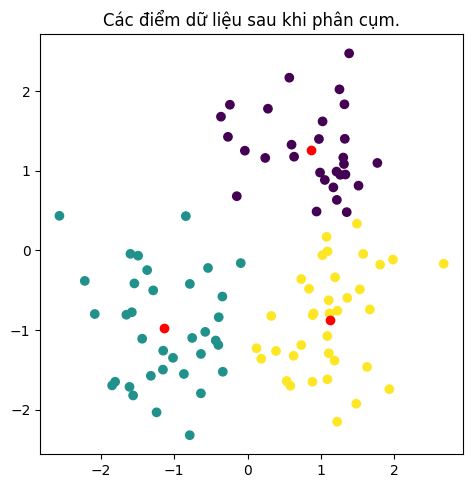

In [29]:
best_centroid, label = k_means(X = X, n_cluster = 3)
print(label)
print(best_centroid)
plt.figure(figsize=(12, 12))
plt.subplot(222)
plt.scatter(X[:, 0], X[:, 1], c=label)
plt.scatter(best_centroid[:, 0], best_centroid[:, 1], c='red')
plt.title("Các điểm dữ liệu sau khi phân cụm.")
plt.show()

## Application

In [30]:
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
from IPython.display import Image, display

Đọc dữ liệu hình ảnh

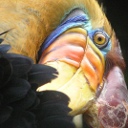

Số chiều của dữ liệu hình ảnh:  (16384, 3)
Tổng số điểm ảnh là:  16384
Mỗi điểm ảnh có số chiều =  3


In [31]:
path_img = 'bird_small.png'
display(Image(path_img, width = 250, unconfined = True))
img = io.imread(path_img)
data_img = (img / 255.0).reshape(-1, img.shape[2]) # chuyển ma trận 128x128x3 về mảng 2 chiều
img_shape = img.shape
print("Số chiều của dữ liệu hình ảnh: ", data_img.shape)
print("Tổng số điểm ảnh là: ", data_img.shape[0])
print("Mỗi điểm ảnh có số chiều = ", data_img.shape[1])

Nén ảnh bằng giải thuật K-means

In [32]:
n_color = 10
best_centroid, label = k_means(data_img, n_cluster = n_color)
img_128 = best_centroid[label]
# chuẩn hoá lại kích thước ảnh theo chiều dài, chiều rộng ban đầu
img_128 = np.reshape(img_128, img_shape)

Ảnh nén bằng K-means tự viết


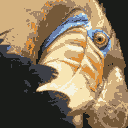

Ảnh nén bằng K-means của thư viện 


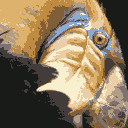

Ảnh gốc


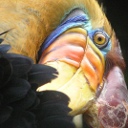

In [ ]:
print('Ảnh nén bằng K-means tự viết')
display(Image('img_128.png', width = 250, unconfined = True)) # kết quả tự cài đặt
print('Ảnh nén bằng K-means của thư viện ')
display(Image('img128.png', width = 250, unconfined = True)) # kết quả của thư viện
print('Ảnh gốc') 
display(Image(path_img, width = 250, unconfined = True))